<font size="+3"><strong>TMDb Movie Data Analysis</strong></font>

In [ ]:
__author__ = "Donald Ghazi"
__email__ = "donald@donaldghazi.com"
__website__ = "donaldghazi.com"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Note**: This project was originally introduced on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
>
> - This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> - The primary goal of this project is to practice my pandas, Numpy, and Matplotlib data analysis techniques.
> - The investigation process is divided into four different parts.
                1) Possible Questions
                2) Data Wrangling and Data Cleaning
                3) Exploratory Data Analysis
                4) Conclusions
            
> - Objectives of Investigation
                1) Which genres are most popular from year to year?
                2) How did film budgets change from each decade?
                3) What kinds of properties are associated with movies that have high revenues?

In [215]:
# import packages 
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [216]:
#load and inspect data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [217]:
#check for data dimensions
df.shape

(10866, 21)

In [218]:
#check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [219]:
#double check for how many missing values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [220]:
#chekck for duplicated rows
df.duplicated().sum()

1

In [221]:
# check for descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [222]:
#check for genres and their counts
df['genres'].value_counts()

Comedy                                            712
Drama                                             712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
Comedy|Romance                                    268
Horror|Thriller                                   259
Horror                                            253
Comedy|Drama|Romance                              222
Drama|Thriller                                    138
Comedy|Family                                     102
Action|Thriller                                   101
Thriller                                           93
Drama|Comedy                                       92
Animation|Family                                   90
Crime|Drama|Thriller                               81
Crime|Drama                                        74
Comedy|Horror                                      72
Drama|Comedy|Romance        

In [223]:
#look at films that have above median popularity points
df_popular=df.query('popularity >= 15')
df_popular.sort_values(by = ['popularity'], ascending = [False]).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


> - Gathered Information
       1) Popularity points is vague. Not clear on how it was measured.Very skewed due to outliers.
       2) Missing some imdb_id and they aren't integers either. 
       3) Has 1 duplicated row.
       4) genres contain multiple values separated by pipe (|) characters and missing values 
       5) budget_adj & revenue_adj data more suitable ($ inflation over time).
            
> - Data Cleaning Plans
        1) Drop unnecesary columns
        2) Drop duplicated rows
        3) Create column for 'decades'
        4) Separate genres and tally to find highest count per year to determine what was popular 

### Data Cleaning 

In [224]:
#make a copy of the original df
movies=df.copy()

In [225]:
#drop duplicated rows
movies.drop_duplicates(inplace=True)

In [226]:
#drop unnecessary columns excluding imdb_id since all values are present in id 
col = ['homepage', 'tagline', 'overview', 'budget', 'revenue','original_title','cast','director',
       'keywords','overview','production_companies','release_date']
movies.drop(col, axis=1, inplace=True)

In [227]:
#check to see if columns are dropped
movies.head(1)

,id,imdb_id,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [228]:
#drop null values in genres column
drop = ['genres']
movies.dropna(subset=drop,how='any',inplace=True)

In [229]:
#use pd .str.split to split series (genres)                                                      *returns as series
#use pd .apply to pass and apply the function (pd.Series) to above (Level 1 =column names)    *stored as new series
#use pd .stack to reshape into a stacked form                                  *creates more rows (separated genres)   
#use pd .reset_index to reset index                                * drop=True drops original index labels 

genre_split = movies['genres'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)

#name the new column 
genre_split.name = 'genre'

#use pd. join to combine columns (b/c it maybe differently indexed)
movies = movies.drop(['genres'], axis=1).join(genre_split)

In [230]:
#check data to see genres are separated
movies.head(3)

,id,imdb_id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction


In [231]:
#check for genre categories and their total count
movies['genre'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

In [232]:
#above shows that there are 20 genres 
#use np unique function to double check 
movies['genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [233]:
#create decade column to the movies df 

#create bins and defining exact edges 
edges = [1959, 1970, 1980, 1990, 2000, 2010, 2016]

#values that fall within the edges will be placed under these names accordingly 
names = ['1960', '1970', '1980', '1990', '2000', '2010']

#use pd.cut to categorize bin values into discrete intervals 
#bins are constant size 
#values from release_year are 1-dimensional 
#labels set lists of values correspond to how the age values will be put in bins by decades
movies['decade'] = pd.cut(movies['release_year'], edges, labels=names)
movies.head()

,id,imdb_id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,decade
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,2010
1,76341,tt1392190,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,2010


In [234]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 11 columns):
id              26955 non-null int64
imdb_id         26932 non-null object
popularity      26955 non-null float64
runtime         26955 non-null int64
vote_count      26955 non-null int64
vote_average    26955 non-null float64
release_year    26955 non-null int64
budget_adj      26955 non-null float64
revenue_adj     26955 non-null float64
genre           26955 non-null object
decade          26955 non-null category
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 2.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most produced throughout time?



In [235]:
#make a copy of the original df
genre=movies.copy()

In [236]:
#double check (should be 0)
genre.duplicated().sum()

0

In [237]:
#use movie production count to measure popularity
#split data into groups
#use pd groupby where first grouping is based on 'release year' and within each release year, group based on 'genre'
#use np size to count the number of elements along the axis 
#use pd reset_index to create column name as 'count'

genre=genre.groupby(['release_year', 'genre']).size().reset_index(name='count')
genre.head(10)

,release_year,genre,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
5,1960,Family,3
6,1960,Fantasy,2
7,1960,Foreign,1
8,1960,History,5
9,1960,Horror,7


In [238]:
genre.shape

(1049, 3)

In [239]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
release_year    1049 non-null int64
genre           1049 non-null object
count           1049 non-null int64
dtypes: int64(2), object(1)
memory usage: 24.7+ KB


In [240]:
#group based on 'release year' but not as new index        *returns as an object (new df)
#use apply to accompany the following function; lambda 
#lambda function sorts data frame from the column 'count', minimum being 1 count
#reset_index(drop=True) is used to drop the current index of the df and replace it with index of increaseing integer
#reset_index(drop=True) won't drop columns (for visualization)

popular=genre.groupby(by='release_year', as_index=False).apply(lambda x: x.sort_values('count').tail(1)).reset_index(drop=True)
popular

,release_year,genre,count
0,1960,Drama,13
1,1961,Drama,16
2,1962,Drama,21
3,1963,Drama,13
4,1964,Drama,20
5,1965,Drama,20
6,1966,Comedy,16
7,1967,Comedy,17
8,1968,Drama,20
9,1969,Drama,13


In [241]:
#check for most popular genres
popular['genre'].unique()

array(['Drama', 'Comedy'], dtype=object)

In [242]:
#check how many Drama and Comedy bars to expect on graph
popular['genre'].value_counts()

Drama     47
Comedy     9
Name: genre, dtype: int64

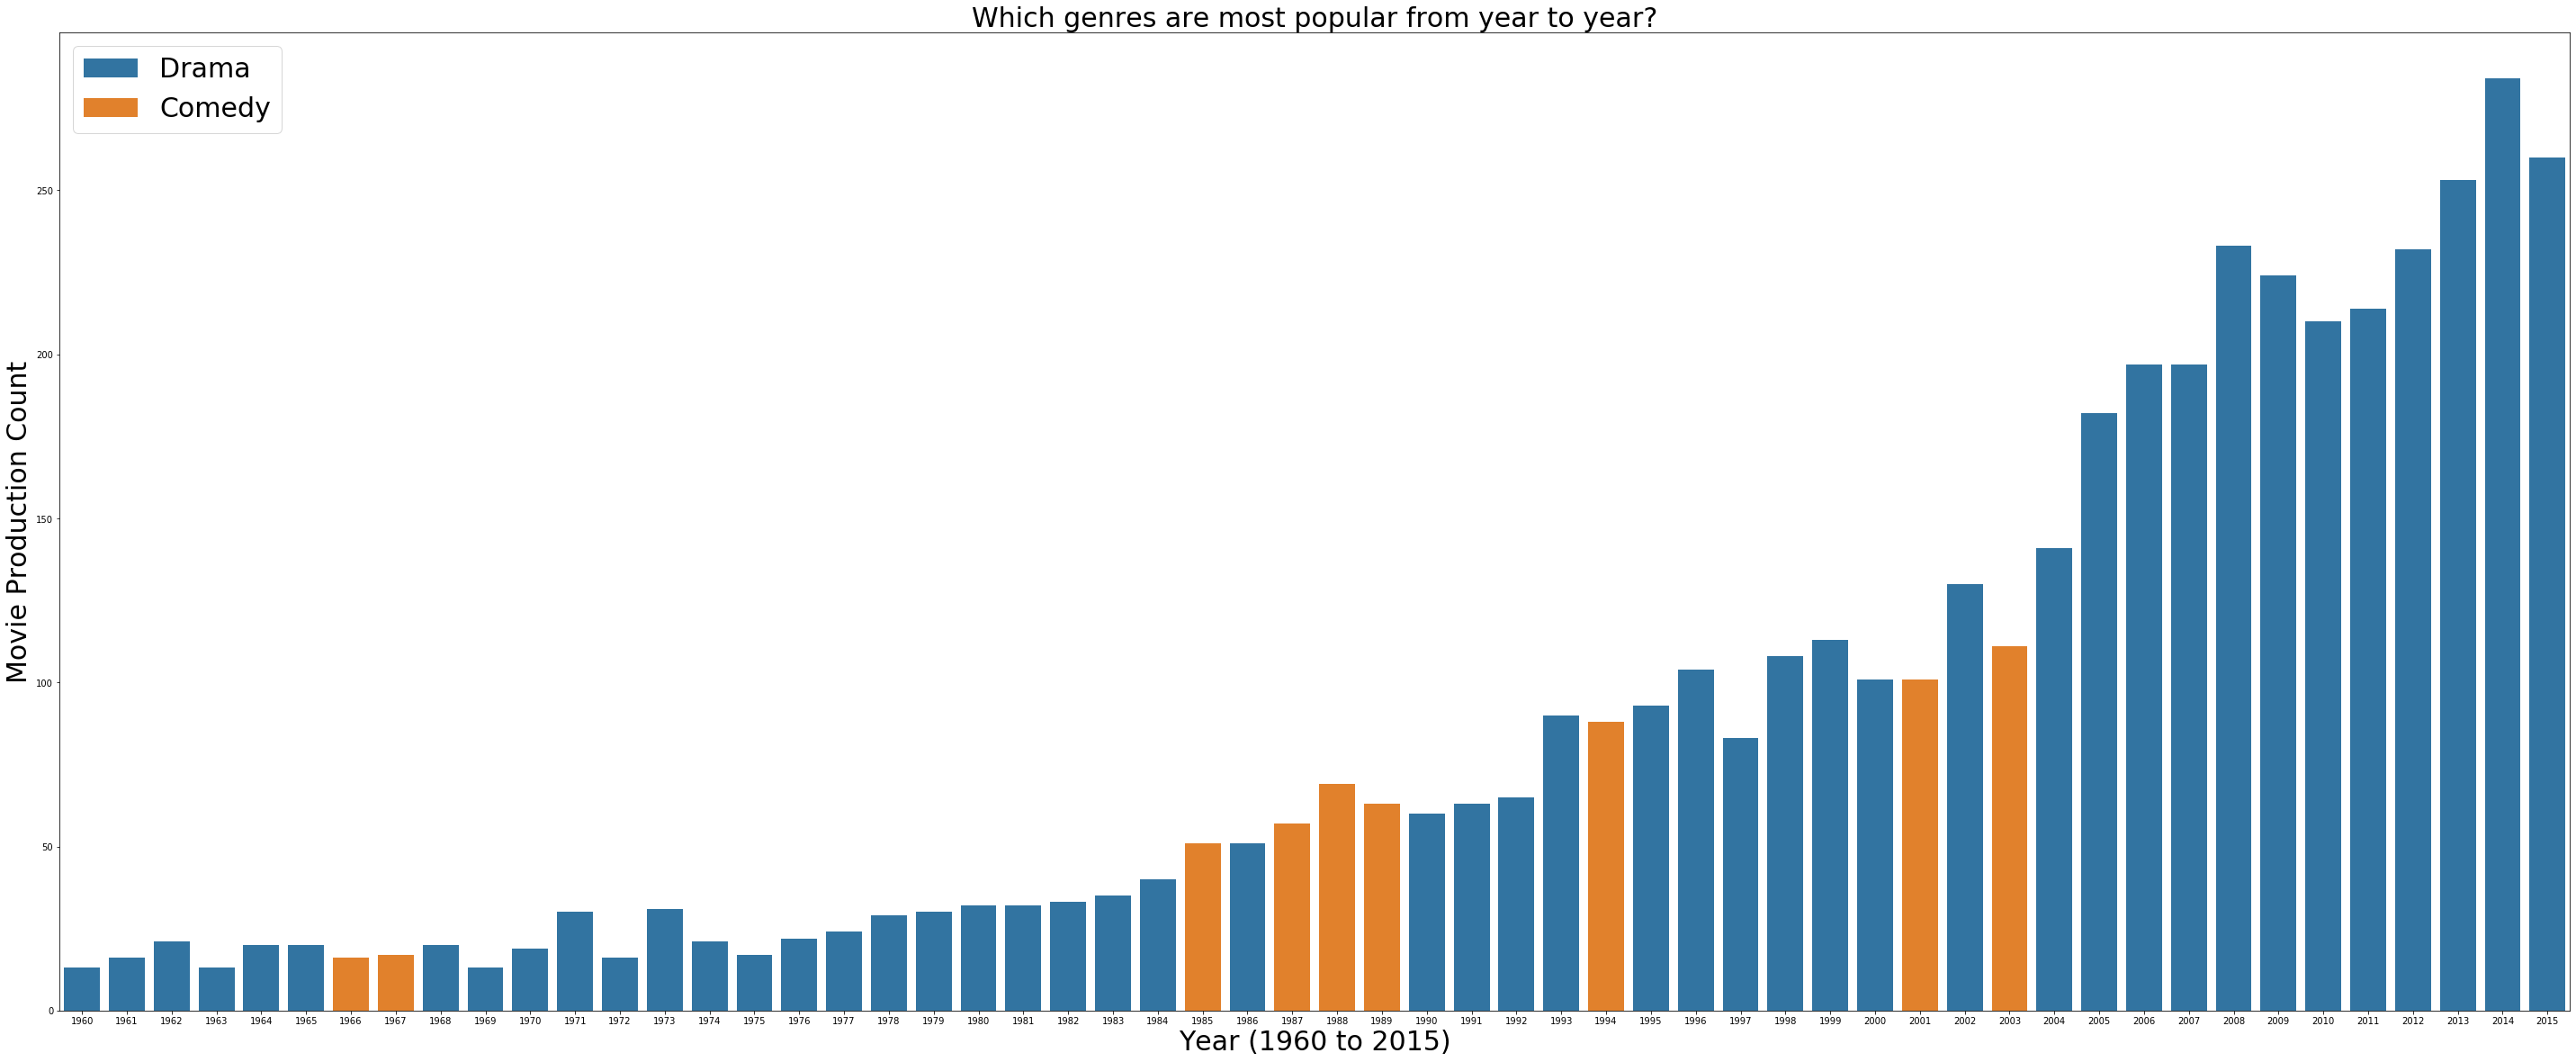

In [243]:
# there should be 9 Comedy and 47 Drama bars
#set figure size
plt.figure(figsize = (50,20))

#use seaborn to barplot with bar color respective to popular genre 
sns.barplot(x = 'release_year', y = 'count', data = popular, hue='genre',dodge=False)

plt.title("Which genres are most popular from year to year?", fontsize = 30)
plt.xlabel("Year (1960 to 2015)", fontsize = 30)
plt.ylabel("Movie Production Count", fontsize = 30)
plt.legend(prop={"size":30})

plt.show()

> - Answers
        1) Top two most popular genres based on production count are Drama and Comedy
        2) Drama has been most popular generally from year to year 


### Research Question 2: How did film budgets change from each decade in average?

In [244]:
#set copy of cleaned df 
budget = movies.copy()

In [245]:
#double check
budget.head()

,id,imdb_id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,decade
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,2010
0,135397,tt0369610,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,2010
1,76341,tt1392190,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,2010


In [246]:
#double check again 
budget.duplicated().sum()

0

In [247]:
budget=budget.groupby('decade')['budget_adj'].mean().reset_index(name='budget')
budget

,decade,budget
0,1960,1.438998e+07
1,1970,1.033623e+07
2,1980,1.467960e+07
3,1990,2.808715e+07
4,2000,2.433703e+07
5,2010,1.706534e+07


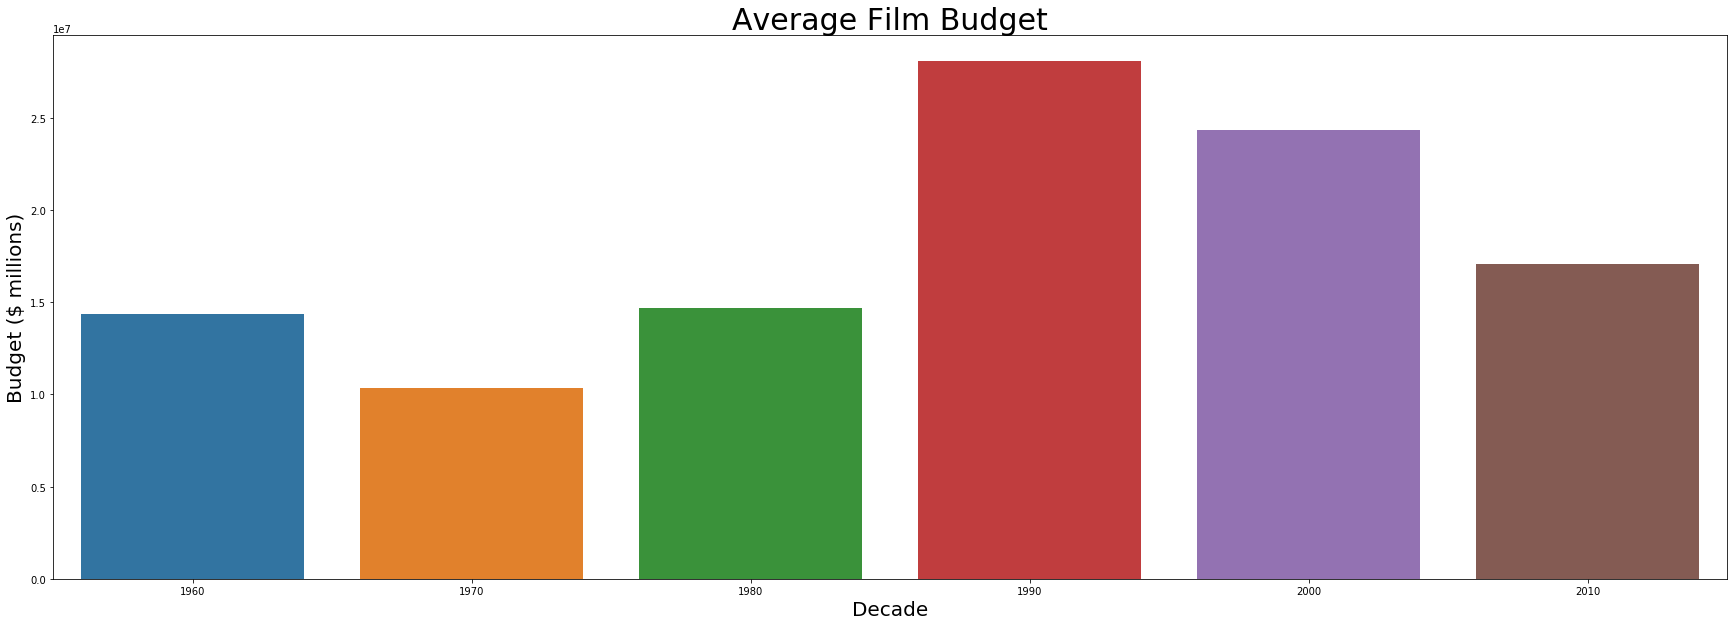

In [248]:
#set figure size 
plt.figure(figsize = (30,10))

#use seaborn to lineplot average film budget per decade 
sns.barplot(x = 'decade', y = 'budget', data = budget)

plt.title("Average Film Budget", fontsize = 30)
plt.xlabel("Decade", fontsize = 20)
plt.ylabel("Budget ($ millions)", fontsize = 20)


plt.show()

> - Answers
        1) 1990s saw the highest film budget on average while 1970s was the lowest.
        2) There is an increase in film production from 1970s to 1990s.
        3) There is a decrease in film production from 1990s to 2010s.
        4) Since the data contains year up to 2015, film budget in 2010s will increase when updated.

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

In [249]:
#set copy of original df, better to use the original b/c cleaned df includes many duplicated movies per genre 
rev = df.copy()
rev.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [250]:
#double check 
rev.duplicated().sum()

1

In [251]:
#drop duplicates
rev.drop_duplicates(inplace=True)

In [252]:
#make new df where it's sorted by decreasing revenue, should have different id
high_rev = rev.sort_values(by = ['revenue_adj'], ascending = [False])
high_rev.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09


In [253]:
#use groupby take the top 100 highest revenue movies 
high_rev = high_rev.groupby('revenue_adj').head(100)
high_rev.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [254]:
#use pd corr function to see correlation of the high_rev df 
high_rev_corr=high_rev.corr(method='pearson')
high_rev_corr

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.129788,-0.077201,-0.049960,-0.039972,0.059658,-0.004376,0.511269,-0.152945,-0.121874
popularity,0.129788,1.000000,0.483570,0.630696,0.202276,0.788912,0.288049,0.172666,0.442903,0.563561
budget,-0.077201,0.483570,1.000000,0.705857,0.249409,0.587950,0.041482,0.237735,0.964322,0.563834
revenue,-0.049960,0.630696,0.705857,1.000000,0.239270,0.765150,0.207747,0.122335,0.676518,0.905605
runtime,-0.039972,0.202276,0.249409,0.239270,1.000000,0.252686,0.304114,-0.096219,0.305716,0.265237
vote_count,0.059658,0.788912,0.587950,0.765150,0.252686,1.000000,0.349753,0.197289,0.535817,0.668089
vote_average,-0.004376,0.288049,0.041482,0.207747,0.304114,0.349753,1.000000,-0.092851,0.053597,0.242777
release_year,0.511269,0.172666,0.237735,0.122335,-0.096219,0.197289,-0.092851,1.000000,0.086424,-0.093915
budget_adj,-0.152945,0.442903,0.964322,0.676518,0.305716,0.535817,0.053597,0.086424,1.000000,0.596411
revenue_adj,-0.121874,0.563561,0.563834,0.905605,0.265237,0.668089,0.242777,-0.093915,0.596411,1.000000


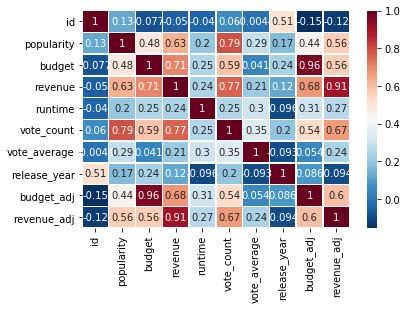

In [255]:
#use seaborn to visualize the correlation above 
sns.heatmap(high_rev_corr, 
            xticklabels=high_rev_corr.columns,
            yticklabels=high_rev_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

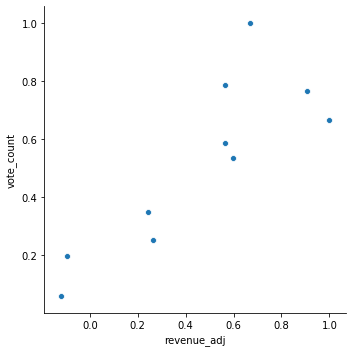

In [256]:
#vote count has highest correlation of .67
sns.relplot(x='revenue_adj', y='vote_count', data=high_rev_corr, kind="scatter")
plt.show()

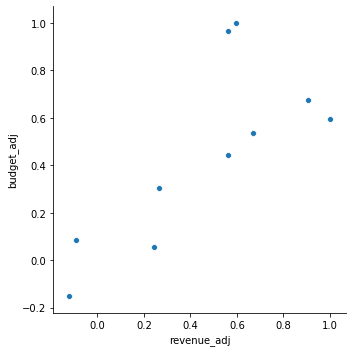

In [257]:
#revenue adjusted has second highest correlation of .6
sns.relplot(x='revenue_adj', y='budget_adj', data=high_rev_corr, kind="scatter")
plt.show()

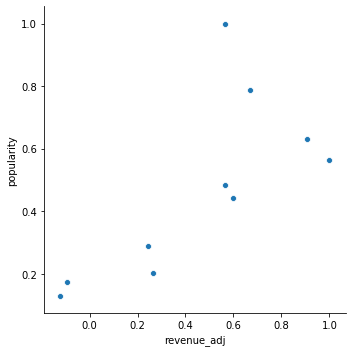

In [258]:
#popularity has the 3rd highest correlation of .56
sns.relplot(x='revenue_adj', y='popularity', data=high_rev_corr, kind="scatter")
plt.show()

> - Answers
        1) Vote Count, Adjusted Budget, and Popularity Points show highest association with movies                                         that have high revenues

<a id='conclusions'></a>
## Conclusions
> **Summary**
> - The top two most popular genres based on production count are Drama and Comedy.
> - Drama has been most popular generally from 1960 to 2015.
> - 1990s saw the highest film budget on average while 1970s was the lowest.
> - There is an increase in film production budget from 1970s to 1990s.
> - There is a decrease in film production budget from 1990s to 2010s.
> - Since the data contains information up to 2015, film budget in 2010s will increase when updated (due to more films produced).
> - Vote Count, Adjusted Budget, and Popularity Points show highest association with movies that have high revenues.

> **Limitations**: 
> - Popularity is deemed subjective and the popularity data contains many outliers. It was unsuitable to use to measure popularity because we don't know how it was derived.
> - The original dataset only contains data from TMDb but there are other sites such as Rotten Tomatoes and Metacritic that collect possibly more accurate data.
> - I should have aimed to answer the 3rd question first in order to maximize my use of cleaned dataframe.
